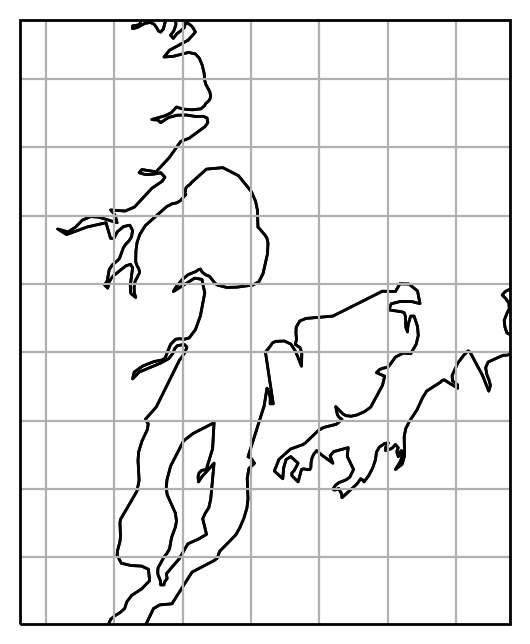

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

proj = ccrs.PlateCarree()

fig = plt.figure(dpi=200)

ax = plt.axes(projection = proj)

ax.coastlines('10m')
# ax.add_feature(cf.BORDERS)
ax.add_feature(cf.STATES.with_scale('10m'))

# The extent bounds are specified as an array [[x0, y0], [x1, y1]], 
# where x0 is the left side of the extent, y0 is the top, x1 is the right and y1 is the bottom.
# extent (x0, x1, y0, y1)
# extent = [-180,180, -90,90] # world
# extent = [-90, -30, 20, -60] # south america
# extent = [-74, -31, 5.5, -33] # brazil
# extent = [-53.5, -45, -11, -20] # brazil
# extent = [-48, -47, -16, -17] # brazil
extent = [-44.906616, -43.831329, -1.820677, -3.146001] # brazil
# extent = [-44, -43, -1, -3] # brazil
# extent = [-90, -30, 20, -60]
# extent = [-100, 30, 0, 80]
# extent = [-87.35, -79.5, 24.1, 30.8]


ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.gridlines()

In [2]:
# First: read the geotiff image with GDAL.
from osgeo import gdal, osr

gdal.UseExceptions()

directory = r'resources/S2A_MSIL2A_20190525T132241_N0212_R038_T23MNT_20190525T160524.SAFE/GRANULE/L2A_T23MNT_A020484_20190525T132236/IMG_DATA/R60m/'
filename = r'T23MNT_20190525T132241_TCI_60m.jp2'
image = directory + filename


ds = gdal.Open(image)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print('\n\n## ds ##:\n\n' + str(ds))
print('\n\n## data ##:\n\n' + str(data))
print('\n\n## gt ##:\n\n' + str(gt))
print('\n\n## proj ##:\n\n' + str(proj))
print('\n\n## inproj ##:\n\n' + str(inproj))



## ds ##:

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f972efa9960> >


## data ##:

[[[  0   0   0 ...  19  18  19]
  [  0   0   0 ...  15  18  16]
  [  0   0   0 ...  17  17  17]
  ...
  [ 13  35  33 ... 255 222 255]
  [ 20  37  34 ... 243 217 188]
  [ 29  37  35 ... 102 139  72]]

 [[  0   0   0 ...  28  26  27]
  [  0   0   0 ...  24  26  24]
  [  0   0   0 ...  25  25  25]
  ...
  [ 25  73  68 ... 255 238 255]
  [ 43  70  70 ... 254 240 222]
  [ 57  75  76 ... 129 168 102]]

 [[  0   0   0 ...  46  44  45]
  [  0   0   0 ...  42  44  42]
  [  0   0   0 ...  44  44  44]
  ...
  [ 18  44  43 ... 248 225 248]
  [ 26  45  44 ... 255 232 220]
  [ 34  44  44 ... 122 150  90]]]


## gt ##:

(499980.0, 60.0, 0.0, 9800020.0, 0.0, -60.0)


## proj ##:

PROJCS["WGS 84 / UTM zone 23S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UN